In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)
import pycountry

In [2]:
df = pd.read_excel('jobs_es.xlsx')
df.head(1)

,Identificación del trabajo,título,ubicación,Departamento,rango de salario,Perfil de la compañía,descripción,requisitos,beneficios,teletrabajo,has_company_logo,has_questions,Tipo de empleo,experiencia requerida,educación requerida,industria,función,fraudulento,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,mercado interno,"EE. UU., NY, Nueva York",Márketing,NaN,"Somos Food52, y hemos creado un sitio de cocin...","Food52, una comunidad de alimentos en línea de...",La experiencia con los sistemas de administrac...,NaN,0 0,1,0 0,Otro,Internado,NaN,NaN,Márketing,0 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df

,Identificación del trabajo,título,ubicación,Departamento,rango de salario,Perfil de la compañía,descripción,requisitos,beneficios,teletrabajo,has_company_logo,has_questions,Tipo de empleo,experiencia requerida,educación requerida,industria,función,fraudulento
0,1,mercado interno,"EE. UU., NY, Nueva York",Márketing,NaN,"Somos Food52, y hemos creado un sitio de cocin...","Food52, una comunidad de alimentos en línea de...",La experiencia con los sistemas de administrac...,NaN,0 0,1,0 0,Otro,Internado,NaN,NaN,Márketing,0 0
1,2,Servicio al cliente - Producción de video en l...,"Nueva Zelanda, Auckland",Éxito,NaN,"90 Seconds, el servicio de producción de video...",Organizado - Centrado - Vibrante - Impresionan...,Lo que esperamos de usted: su responsabilidad ...,Lo que obtendrá de nosotros Al formar parte de...,0 0,1,0 0,Tiempo completo,No aplica,NaN,Marketing y publicidad,Servicio al Cliente,0 0
2,3,Asistente de puesta en marcha de maquinaria (CMA),"EE. UU., IA, Wever",NaN,NaN,Valor Services proporciona soluciones de fuerz...,"Nuestro cliente, ubicado en Houston, está busc...",Implemente procedimientos de precomisionamient...,NaN,0 0,1,0 0,NaN,NaN,NaN,NaN,NaN,0 0
3,4 4,Ejecutivo de cuentas - Washington DC,"Estados Unidos, DC, Washington",Ventas,NaN,Nuestra pasión por mejorar la calidad de vida ...,LA EMPRESA: ESRI - Instituto de Investigación ...,"EDUCACIÓN: Bachillerato o Máster en SIG, admin...",Nuestra cultura es cualquier cosa menos corpor...,0 0,1,0 0,Tiempo completo,Nivel medio superior,Licenciatura,Software de ordenador,Ventas,0 0
4,5 5,Gerente de revisión de facturas,"Estados Unidos, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC es una firma de consu...,TÍTULO DE TRABAJO: Gerente de Revisión de Deta...,CALIFICACIONES: Licencia RN en el Estado de Te...,Beneficios completos ofrecidos,0 0,1,1,Tiempo completo,Nivel medio superior,Licenciatura,Hospital y cuidado de la salud,Proveedor de atención sanitaria,0 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17494
17496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17495
17497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17496
17498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17497


In [4]:
df.rename(columns={'Identificación del trabajo' : 'ID_Empleo', 
                        'título': 'Título', 
                        'ubicación': 'Ubicación', 
                        'Departamento': 'Departamento', 
                        'rango de salario': 'Salario', 
                        'Perfil de la compañía': 'Compañía', 
                        'descripción': 'Descripción', 
                        'requisitos': 'Requisitos', 
                        'beneficios': 'Beneficios', 
                        'teletrabajo': 'Teletrabajo', 
                        'has_company_logo': 'Logo_empresa', 
                        'has_questions': 'Preguntas', 
                        'Tipo de empleo': 'Tipo_empleo', 
                        'experiencia requerida': 'Experiencia', 
                        'educación requerida': 'Educación', 
                        'industria': 'Sector', 
                        'función': 'Funciones'}, inplace=True)

print(list(df))

['ID_Empleo', 'Título', 'Ubicación', 'Departamento', 'Salario', 'Compañía', 'Descripción', 'Requisitos', 'Beneficios', 'Teletrabajo', 'Logo_empresa', 'Preguntas', 'Tipo_empleo', 'Experiencia', 'Educación', 'Sector', 'Funciones', 'fraudulento']


In [5]:
df.head(1)

,ID_Empleo,Título,Ubicación,Departamento,Salario,Compañía,Descripción,Requisitos,Beneficios,Teletrabajo,Logo_empresa,Preguntas,Tipo_empleo,Experiencia,Educación,Sector,Funciones,fraudulento
0,1,mercado interno,"EE. UU., NY, Nueva York",Márketing,NaN,"Somos Food52, y hemos creado un sitio de cocin...","Food52, una comunidad de alimentos en línea de...",La experiencia con los sistemas de administrac...,NaN,0 0,1,0 0,Otro,Internado,NaN,NaN,Márketing,0 0


In [6]:
df.isna().sum() / len(df)

ID_Empleo       0.600057
Título          0.600057
Ubicación       0.606286
Departamento    0.856800
Salario         0.937314
Compañía        0.665200
Descripción     0.600286
Requisitos      0.660171
Beneficios      0.366457
Teletrabajo     0.200114
Logo_empresa    0.210800
Preguntas       0.458971
Tipo_empleo     0.612914
Experiencia     0.429771
Educación       0.374857
Sector          0.361486
Funciones       0.499143
fraudulento     0.000114
dtype: float64

In [7]:
df2 = df.copy()


In [8]:
df2.drop(['Salario', 'ID_Empleo', 'Departamento', 'Beneficios'], axis = 1, inplace = True)
df2.head(1)

,Título,Ubicación,Compañía,Descripción,Requisitos,Teletrabajo,Logo_empresa,Preguntas,Tipo_empleo,Experiencia,Educación,Sector,Funciones,fraudulento
0,mercado interno,"EE. UU., NY, Nueva York","Somos Food52, y hemos creado un sitio de cocin...","Food52, una comunidad de alimentos en línea de...",La experiencia con los sistemas de administrac...,0 0,1,0 0,Otro,Internado,NaN,NaN,Márketing,0 0


In [9]:
df2 = df2.sort_values('Título').reset_index(drop = True)

In [10]:
df2.isna().sum()

Título          10501
Ubicación       10610
Compañía        11641
Descripción     10505
Requisitos      11553
Teletrabajo      3502
Logo_empresa     3689
Preguntas        8032
Tipo_empleo     10726
Experiencia      7521
Educación        6560
Sector           6326
Funciones        8735
fraudulento         2
dtype: int64

In [11]:
df2['Tipo_empleo'] = df2['Tipo_empleo'].bfill(axis=0)
df2['Experiencia'] = df2['Experiencia'].bfill(axis=0)
df2['Educación'] = df2['Educación'].bfill(axis = 0)
df2['Sector'] = df2['Sector'].bfill(axis=0)
df2['Funciones'] = df2['Funciones'].bfill(axis=0)

In [12]:
df3 = df2.copy()
df3 = df3[df3['Descripción'].notna()]
df3.isna().sum()

Título             0
Ubicación        109
Compañía        1136
Descripción        0
Requisitos      1052
Teletrabajo        0
Logo_empresa       0
Preguntas          0
Tipo_empleo        0
Experiencia        0
Educación          0
Sector             0
Funciones          0
fraudulento        0
dtype: int64

In [13]:
df3 = df3.dropna(axis = 0, how = 'any')
df3.shape


(5063, 14)

In [14]:
df3 = df3.drop_duplicates(keep = 'first')
df4 = df3.copy()
df4.head()

,Título,Ubicación,Compañía,Descripción,Requisitos,Teletrabajo,Logo_empresa,Preguntas,Tipo_empleo,Experiencia,Educación,Sector,Funciones,fraudulento
0,(Pasantía) Asistente de Comunicación / E-Marke...,"BE, BRU, Bruselas","Fundada a principios de 2013, la startup # URL...","Nacido en 2013, # URL_1126a42ca4e3346cc3e1a08f...",¿Quieres unirte a nuestro equipo? Veamos si cu...,0 0,1,1,Tiempo completo,Internado,Sin especificar,Internet,Márketing,0 0
1,(Senior) Desarrollador Producto en la nube (m ...,"DE, BY, Munich",hola worldtalents23_ impulsa el cambio en el r...,Somos una empresa de Internet de rápido crecim...,Calificaciones Sus calificaciones: Desarrollo ...,0 0,1,1,Tiempo completo,Asociar,Licenciatura,Hospitalidad,Tecnologías de la información,0 0
5,.Desarrollador de redes,"NL, La Haya",EUROPEAN DYNAMICS (# URL_c66532ffa1ce76ab447da...,Actualmente tenemos una vacante para un Desarr...,Sus habilidades: Título universitario con un m...,0 0,1,1,Tiempo completo,Nivel medio superior,Licenciatura,Software de ordenador,Tecnologías de la información,0 0
8,.Desarrollador de redes,"IE, Dublín",Ryanair es la aerolínea de tarifas bajas favor...,Estamos buscando un desarrollador web experime...,Los candidatos exitosos tendrán la oportunidad...,0 0,1,0 0,Tiempo completo,Nivel medio superior,Sin especificar,Aerolíneas / Aviación,Tecnologías de la información,0 0
9,.Desarrollador de redes,"EE. UU., CO, Denver",El equipo de OneReach está compuesto por un gr...,Este es un trabajo para alguien que quiere for...,Habilidades tecnológicas requeridas & amp; Ai....,0 0,1,0 0,Tiempo completo,Nivel medio superior,Sin especificar,Software de ordenador,Tecnologías de la información,0 0


In [15]:
df4.shape

(5000, 14)

In [16]:
df4['Descripción'] = df4['Descripción'] + ' ' + df4['Requisitos'] + ' ' + df4['Compañía']
df4.drop(['Compañía', 'Requisitos'], axis = 1, inplace = True)

In [17]:
df4.head(3)

,Título,Ubicación,Descripción,Teletrabajo,Logo_empresa,Preguntas,Tipo_empleo,Experiencia,Educación,Sector,Funciones,fraudulento
0,(Pasantía) Asistente de Comunicación / E-Marke...,"BE, BRU, Bruselas","Nacido en 2013, # URL_1126a42ca4e3346cc3e1a08f...",0 0,1,1,Tiempo completo,Internado,Sin especificar,Internet,Márketing,0 0
1,(Senior) Desarrollador Producto en la nube (m ...,"DE, BY, Munich",Somos una empresa de Internet de rápido crecim...,0 0,1,1,Tiempo completo,Asociar,Licenciatura,Hospitalidad,Tecnologías de la información,0 0
5,.Desarrollador de redes,"NL, La Haya",Actualmente tenemos una vacante para un Desarr...,0 0,1,1,Tiempo completo,Nivel medio superior,Licenciatura,Software de ordenador,Tecnologías de la información,0 0


In [18]:
df4['codigo_pais'] = df4['Ubicación'].str.split(',', expand=True)[0]
df4['Ciudad'] = df4['Ubicación'].str.split(',', expand = True)[2]
df4.head(3)

,Título,Ubicación,Descripción,Teletrabajo,Logo_empresa,Preguntas,Tipo_empleo,Experiencia,Educación,Sector,Funciones,fraudulento,codigo_pais,Ciudad
0,(Pasantía) Asistente de Comunicación / E-Marke...,"BE, BRU, Bruselas","Nacido en 2013, # URL_1126a42ca4e3346cc3e1a08f...",0 0,1,1,Tiempo completo,Internado,Sin especificar,Internet,Márketing,0 0,BE,Bruselas
1,(Senior) Desarrollador Producto en la nube (m ...,"DE, BY, Munich",Somos una empresa de Internet de rápido crecim...,0 0,1,1,Tiempo completo,Asociar,Licenciatura,Hospitalidad,Tecnologías de la información,0 0,DE,Munich
5,.Desarrollador de redes,"NL, La Haya",Actualmente tenemos una vacante para un Desarr...,0 0,1,1,Tiempo completo,Nivel medio superior,Licenciatura,Software de ordenador,Tecnologías de la información,0 0,NL,None


In [19]:
df4.loc[df4['Ciudad'] == ' ', 'Ciudad'] = np.nan
df4.isnull().sum()

Título            0
Ubicación         0
Descripción       0
Teletrabajo       0
Logo_empresa      0
Preguntas         0
Tipo_empleo       0
Experiencia       0
Educación         0
Sector            0
Funciones         0
fraudulento       0
codigo_pais       0
Ciudad          629
dtype: int64

In [20]:
df4.dropna(inplace = True)

In [21]:
import pycountry
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
def country(df):
    if df['codigo_pais'] in list_alpha_2:
        return pycountry.countries.get(alpha_2 = df['codigo_pais']).name
df4['codigo_pais'] = df4.apply(country, axis = 1)

In [22]:
df4.drop(['Ubicación', 'codigo_pais'], axis = 1, inplace = True)
df4.head()

,Título,Descripción,Teletrabajo,Logo_empresa,Preguntas,Tipo_empleo,Experiencia,Educación,Sector,Funciones,fraudulento,Ciudad
0,(Pasantía) Asistente de Comunicación / E-Marke...,"Nacido en 2013, # URL_1126a42ca4e3346cc3e1a08f...",0 0,1,1,Tiempo completo,Internado,Sin especificar,Internet,Márketing,0 0,Bruselas
1,(Senior) Desarrollador Producto en la nube (m ...,Somos una empresa de Internet de rápido crecim...,0 0,1,1,Tiempo completo,Asociar,Licenciatura,Hospitalidad,Tecnologías de la información,0 0,Munich
9,.Desarrollador de redes,Este es un trabajo para alguien que quiere for...,0 0,1,0 0,Tiempo completo,Nivel medio superior,Sin especificar,Software de ordenador,Tecnologías de la información,0 0,Denver
11,.Desarrollador de redes,Quiénes somos Aya Healthcare es una organizaci...,0 0,1,0 0,Tiempo completo,No aplica,Sin especificar,Tecnología de la Información y Servicios,Consultante,0 0,San Diego
17,.Net Developer - Nuevo producto al mercado,"Por segundo año consecutivo, nuestros tecnólog...",0 0,1,0 0,Tiempo completo,Asociar,Sin especificar,Tecnología de la Información y Servicios,Tecnologías de la información,0 0,Auckland


In [23]:
df4.shape
print(list(df4))

['Título', 'Descripción', 'Teletrabajo', 'Logo_empresa', 'Preguntas', 'Tipo_empleo', 'Experiencia', 'Educación', 'Sector', 'Funciones', 'fraudulento', 'Ciudad']


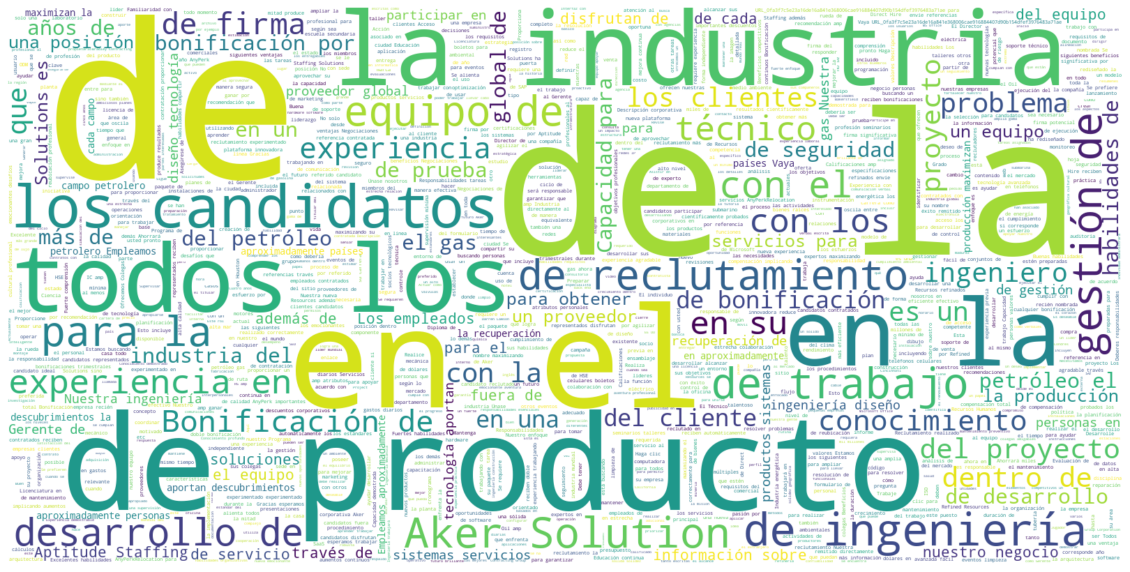

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", stopwords=stopwords, width = 1600, height = 800, max_words = 3000).generate(" ".join(df4[df4.fraudulento == 1]['Descripción']))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')
plt.savefig('proyecto_bedu/nube_de_palabras.png')
plt.show()

In [26]:
df_clean = df4.copy()
df_clean.head(3)

,Título,Descripción,Teletrabajo,Logo_empresa,Preguntas,Tipo_empleo,Experiencia,Educación,Sector,Funciones,fraudulento,Ciudad
0,(Pasantía) Asistente de Comunicación / E-Marke...,"Nacido en 2013, # URL_1126a42ca4e3346cc3e1a08f...",0 0,1,1,Tiempo completo,Internado,Sin especificar,Internet,Márketing,0 0,Bruselas
1,(Senior) Desarrollador Producto en la nube (m ...,Somos una empresa de Internet de rápido crecim...,0 0,1,1,Tiempo completo,Asociar,Licenciatura,Hospitalidad,Tecnologías de la información,0 0,Munich
9,.Desarrollador de redes,Este es un trabajo para alguien que quiere for...,0 0,1,0 0,Tiempo completo,Nivel medio superior,Sin especificar,Software de ordenador,Tecnologías de la información,0 0,Denver


In [28]:
df_clean.shape
df_clean.to_csv('dataset_limpio_empleos.csv')